<a href="https://colab.research.google.com/github/KARTHIKEYANC04052002/Covid_Cases_In_India/blob/main/Covid_Cases_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
from pytz import timezone
date_time = datetime.now(timezone('Asia/Kolkata'))
now = datetime.strftime(date_time, "STATUS AS OF %Y %B %d  %I:%M:%S %p")
now

'STATUS AS OF 2021 July 05  10:47:44 PM'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://api.covid19india.org/state_district_wise.json"

In [4]:
raw_df = pd.read_json(url).T

In [5]:
covid_df = pd.DataFrame()

In [6]:
for i in raw_df.itertuples():
  temp_df = pd.DataFrame(i[1]).T
  temp_df['State'] = i[0]
  if covid_df.shape[0] > 0: covid_df = covid_df.append(temp_df)
  else: covid_df = temp_df

In [7]:
covid_states_df = covid_df.groupby('State', as_index=False).sum()
covid_states_df.drop(['notes'], axis=1, inplace=True)

In [8]:
covid_states_df.style.background_gradient(cmap="Reds", subset=["active"])\
                     .background_gradient(cmap="Oranges", subset=["confirmed"])\
                     .background_gradient(cmap="Greys", subset=["deceased"])\
                     .background_gradient(cmap="Purples", subset=["migratedother"])\
                     .background_gradient(cmap="Greens", subset=["recovered"])\

,State,active,confirmed,deceased,migratedother,recovered
0,Andaman and Nicobar Islands,21,7482,128,0,7333
1,Andhra Pradesh,33964,1905023,12870,0,1858189
2,Arunachal Pradesh,2961,37105,177,0,33967
3,Assam,13718,517194,4652,1347,489040
4,Bihar,1304,722603,9606,1,711692
5,Chandigarh,116,61740,809,0,60815
6,Chhattisgarh,5220,996037,13457,0,977360
7,Dadra and Nagar Haveli and Daman and Diu,37,10572,4,31,10500
8,Delhi,912,1434608,24997,0,1408699
9,Goa,1934,167566,3075,0,162557


In [ ]:
!pip install geopandas

In [10]:
import geopandas as gpd

In [11]:
india_map_df = pd.read_csv("https://raw.githubusercontent.com/KARTHIKEYANC04052002/Covid_Cases_In_India/main/Maps/India_States.csv")

In [12]:
india_map_df = gpd.GeoDataFrame(india_map_df)
india_map_df['geometry'] = gpd.GeoSeries.from_wkt(india_map_df['geometry'])

In [13]:
india_map_df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
covid_states_df['state_name'] = covid_states_df["State"]
covid_states_df = covid_states_df[(covid_states_df['state_name'] != 'Ladakh') & (covid_states_df['state_name'] != 'State Unassigned')]
covid_states_df = covid_states_df.sort_values('state_name')

In [15]:
merged_df = india_map_df.set_index('st_nm').join(covid_states_df.set_index('state_name'))

In [16]:
Titles = ['Active Covid Cases', 'Confirmed Covid Cases', 'Deceased Covid Cases', 'Recovered Covid Cases']
Columns = ['active', 'confirmed', 'deceased', 'recovered']
CMAPs = ['Reds', 'Oranges', 'Greys', 'Greens']

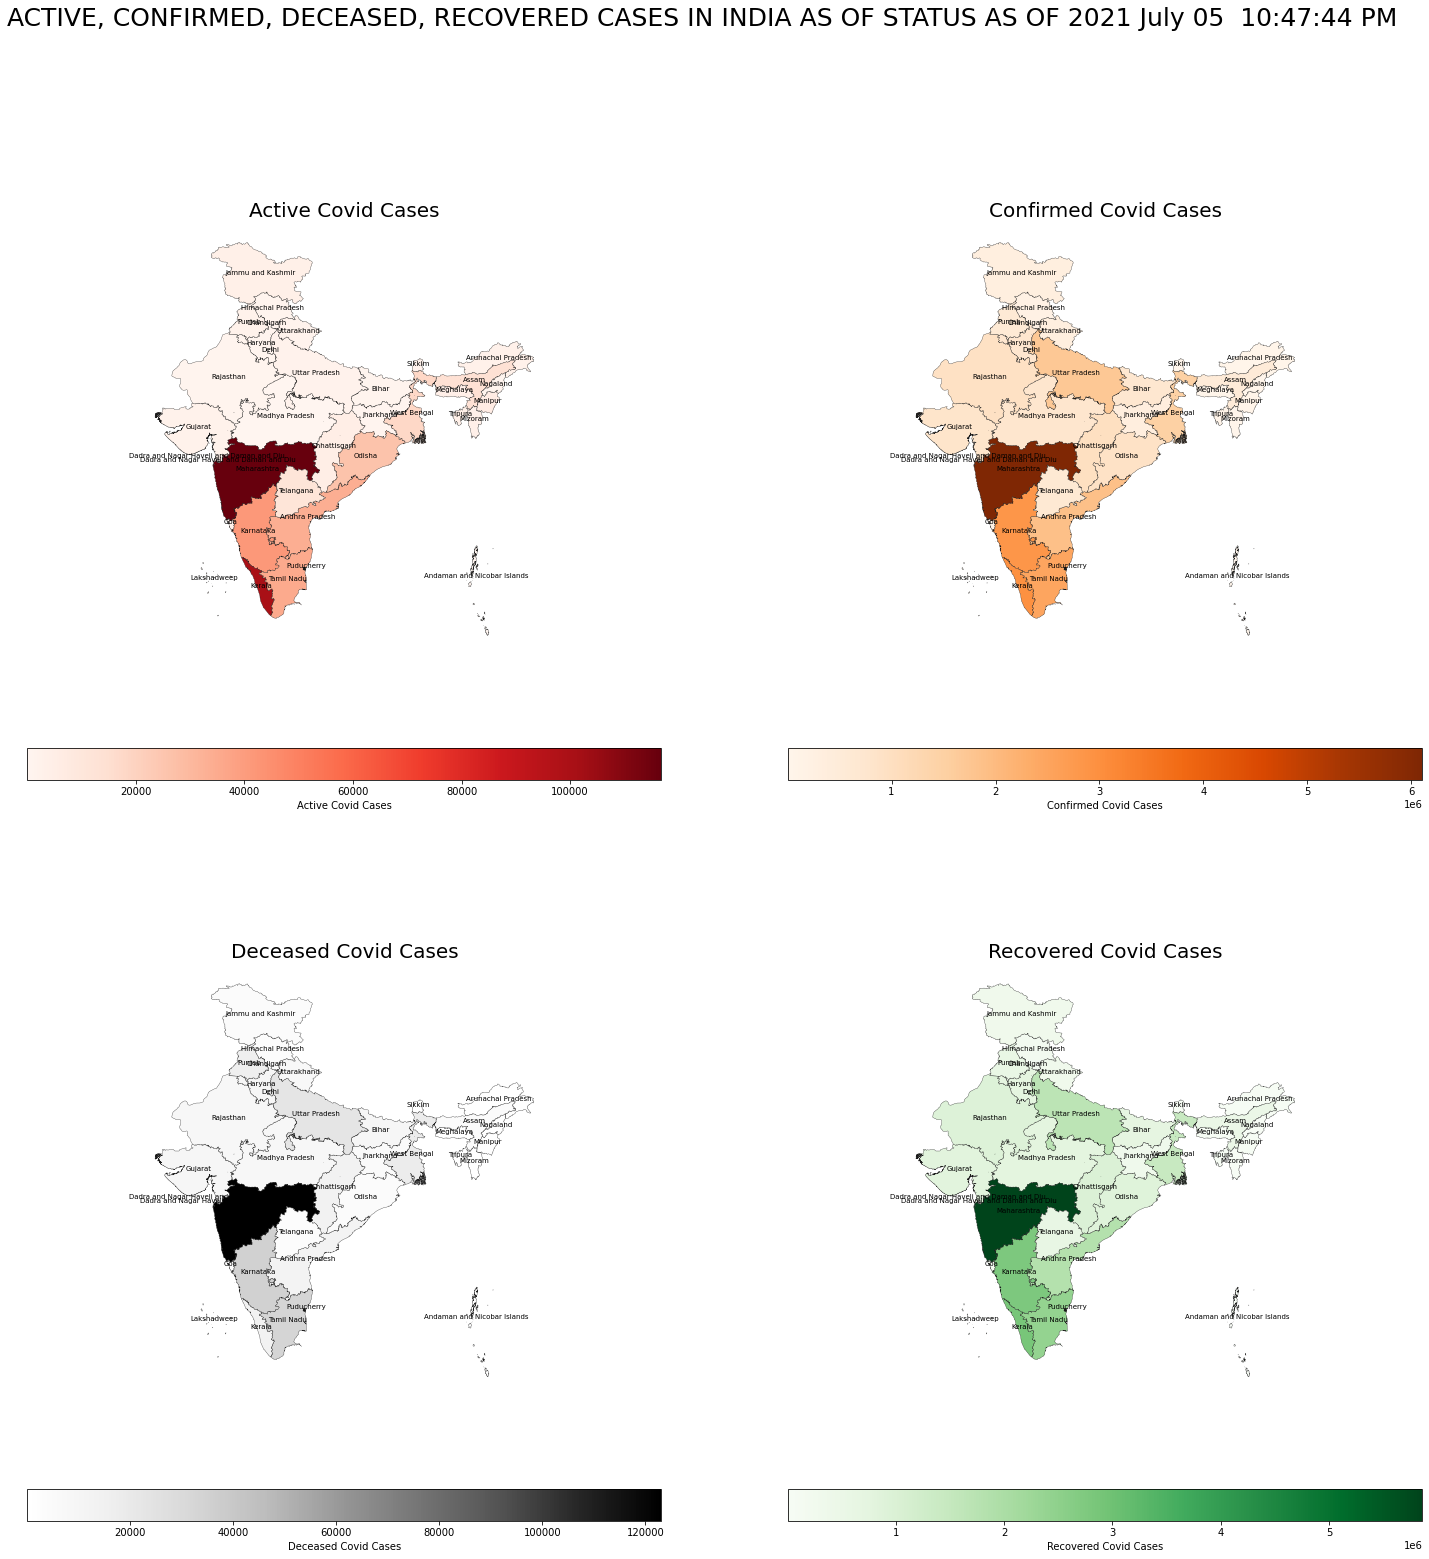

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(25, 25))
fig.suptitle("ACTIVE, CONFIRMED, DECEASED, RECOVERED CASES IN INDIA AS OF {}".format(now), fontsize=25, y=1.0)
for i in range(4):
  row, col = i // 2, i % 2
  ax[row, col].axis('off')
  ax[row, col].set_title(Titles[i], fontdict={'fontsize': '20', 'fontweight' : '5'})
  merged_df.apply(lambda x : ax[row, col].annotate(s=x.State, xy=x.geometry.centroid.coords[0], ha='center', fontsize=7), axis = 1)
  merged_df.plot(column=Columns[i], cmap=CMAPs[i], linewidth=0.3, ax=ax[row, col], edgecolor='0.1', legend=True, legend_kwds={'label': Titles[i], 'orientation': "horizontal"})